In [13]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

In [3]:
def sigmoid(x): # this is our step function
    return np.exp(x)/(1+np.exp(x))
def score(weights, bias, features):
    return np.dot(weights, features) + bias
def prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

In [4]:
# log loss = –y ln(yˆ) – (1 – y) ln(1 – y)
def log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

In [5]:
def total_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

In [6]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [16]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01,
epochs = 1000):
    # utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    return weights, bias, errors

In [17]:
weights, bias, errors = logistic_regression_algorithm(features, labels)
weights, bias

([1.0538286490380961, 0.7091919786335064], -2.343595290198878)

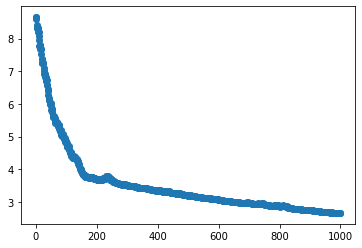

In [18]:
epochs = 1000
plt.scatter(range(epochs), errors)